# Kings County WA House Price Dataset
# 2조 : 오세연, 황승도, 최민성

In [25]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from PIL import Image

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

plt.rc('font', family='Malgun Gothic') # 한글폰트 사용

<img src='https://raw.githubusercontent.com/Choe-minsung/project-study/main/P3/src/KCC.png' width=300/>

In [27]:
df = pd.read_csv('kc_houseprice.csv')

df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


# 데이터탐색

id : A notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms

sqft_living: Square footage of the home (생활면적 평방미터)

sqft_lot: Square footage of the lot (대지면적 평방미터)

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above : Square footage of house apart from basement (지상 생활 면적)

sqft_basement: Square footage of the basement (지하 생활 면적)

yr_built : Built Year

yr_renovated : Year when house was renovated

zipcode: Zip code (우편번호)

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 : LotSize area in 2015(implies-- some renovations)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [29]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [30]:
df['price'].value_counts()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3625, dtype: int64

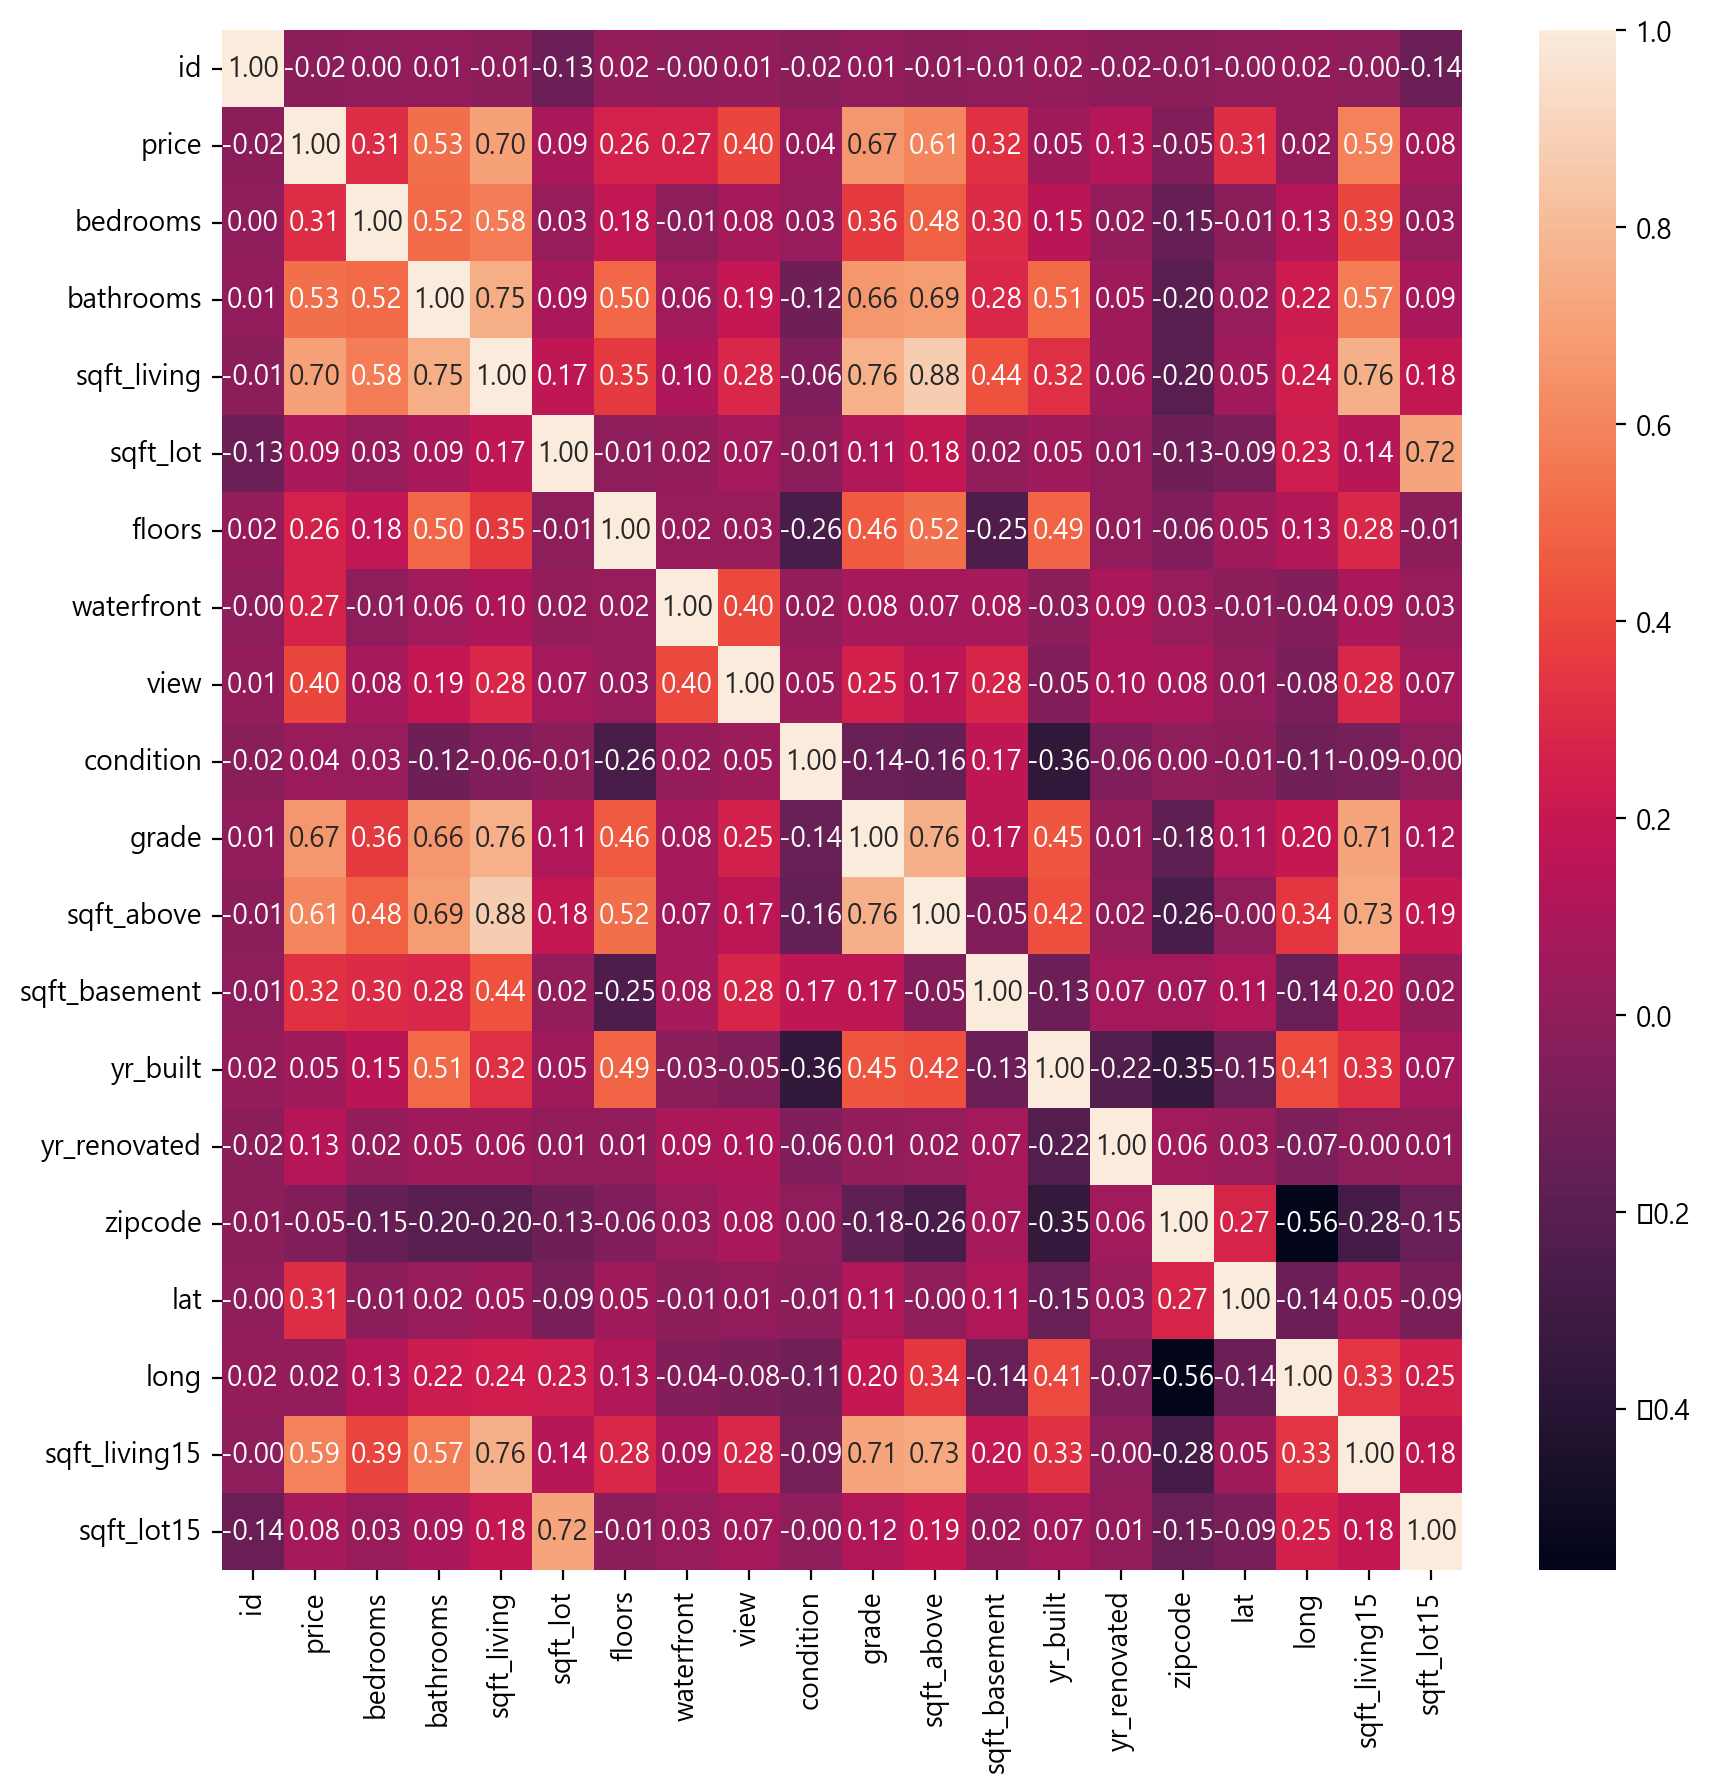

In [31]:
plt.figure(figsize = (10,10))

sns.heatmap(df.corr(), annot = True, fmt = '.2f')
plt.show()

### 집값과의 상관계수
- 1위 : 주거면적 (0.7)
- 2위 : grade (0.67)

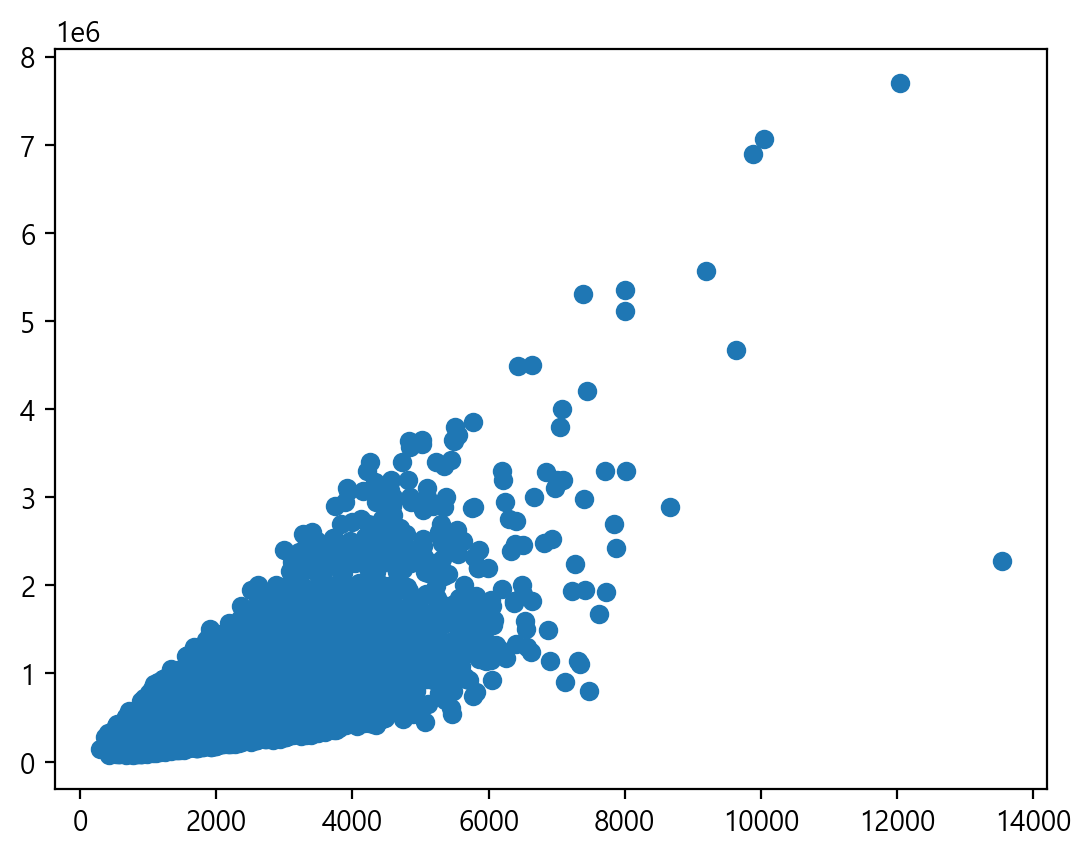

In [32]:
plt.scatter(df['sqft_living'], df['price'])

<BarContainer object of 21613 artists>

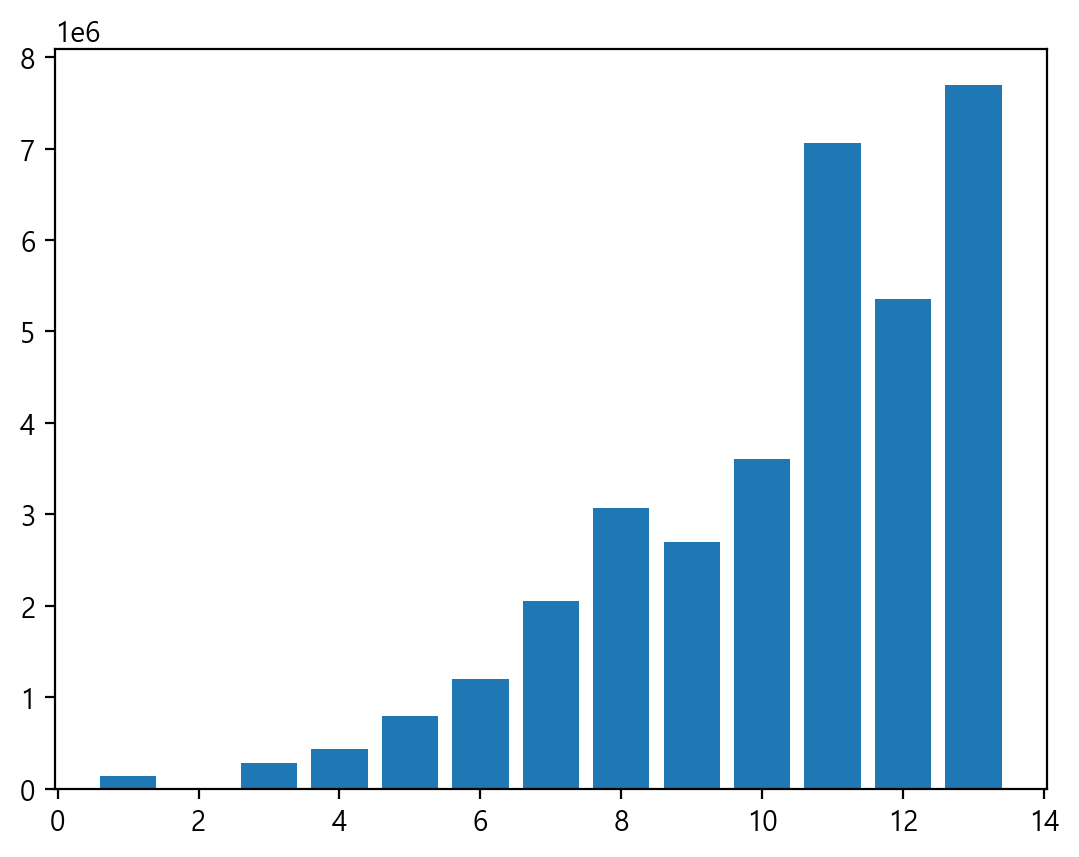

In [33]:
plt.bar(df['grade'], df['price'])

In [34]:
df_sorted = df.sort_values('price', ascending = False)

df_sorted = df_sorted.reset_index(drop = True)

df_sorted

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1,9808700762,20140611T000000,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2,9208900037,20140919T000000,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
21609,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
21610,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
21611,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387


In [35]:
# price 상위 5개 house
df_sorted[['lat', 'long']][:5]

,lat,long
0,47.6298,-122.323
1,47.6500,-122.214
2,47.6305,-122.240
3,47.6289,-122.233
4,47.6232,-122.220


In [36]:
# price 하위 5개 house
df_sorted[['lat', 'long']][-5:]

,lat,long
21608,47.4987,-122.341
21609,47.4808,-122.315
21610,47.6499,-121.909
21611,47.4739,-122.280
21612,47.2638,-121.906


In [37]:
df.shape[0]

21613

In [38]:
# price 상위 5개 house 위치

locations = []

for i in range(5):
    locations.append([df_sorted.loc[i, 'lat'], df_sorted.loc[i, 'long']])
    

locations

[[47.6298, -122.323],
 [47.65, -122.214],
 [47.6305, -122.24],
 [47.6289, -122.233],
 [47.6232, -122.22]]

In [39]:
# 상위 price map 마킹
# !pip install folium
import folium

# 지도 중심좌표 (Madrona Park, Seattle)
map_center = [47.607171, -122.283942]

# 지도 객체 생성
m = folium.Map(location=map_center, zoom_start = 11)

# 마커추가
for location in locations:
    folium.Marker(
        location=location,
        icon=folium.Icon(icon="cloud"),  
    ).add_to(m)
    
m

In [40]:
# price 하위 5개 house 위치

locations = []

for i in range(5):
    locations.append([df_sorted.loc[df.shape[0]-i-1, 'lat'], df_sorted.loc[df.shape[0]-i-1, 'long']])
    

locations

[[47.2638, -121.906],
 [47.4739, -122.28],
 [47.6499, -121.909],
 [47.4808, -122.315],
 [47.4987, -122.341]]

In [41]:
# 하위 price map 마킹

# 지도 중심좌표 (Madrona Park, Seattle)
map_center = [47.607171, -122.283942]

# 지도 객체 생성
m = folium.Map(location=map_center, zoom_start = 10)

# 마커추가
for location in locations:
    folium.Marker(
        location=location,
        icon=folium.Icon(icon="cloud"),  
    ).add_to(m)
    
m

- price 1위 house
- 7,700,000 $
  
<img src='https://raw.githubusercontent.com/Choe-minsung/project-study/main/P3/src/price_a.png' width=700/>

- price -1위 house
- 75,000 $
  
<img src='https://raw.githubusercontent.com/Choe-minsung/project-study/main/P3/src/price_b.png' width=700/>

# 데이터 전처리

In [44]:
# id, date, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15 컬럼 삭제
df = df.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis = 1)

df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400


In [45]:
# 'grade' 컬럼 병합 (0 ~ 7)
df.loc[df['grade'] <= 4,'grade'] = 4
df.loc[df['grade'] >= 11,'grade'] = 11

df['grade'] = df['grade'] - 4

In [46]:
target = 'price'

x = df.drop(target, axis = 1)
y = df[target]

In [51]:
# train, test셋 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# ML 1. LinearRegression

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [54]:
# 정확도 저장
from sklearn.metrics import *

result = {}

result['LR'] = r2_score(y_test, y_pred)

In [55]:
result

{'LR': 0.6015207442099336}

In [56]:
a = model.coef_
b = model.intercept_

a, b

(array([-1118244.34909735,   -85061.2837042 ,   956419.58077731,
         -421489.79474609,     8385.51249437,   638881.04214054,
          217366.07357879,   220299.18542694,   672782.14370162,
          948259.788711  ,   704544.23639297]),
 -183284.78791484993)

In [57]:
# sqft_living, grade 각각의 가중치
a[2], a[-3]

(956419.5807773137, 672782.1437016168)

## 회귀선 시각화
1. 'sqft_living' 과 target의 회귀선시각화
2. 'grade' 과 target의 회귀선시각화

In [58]:
X = [min(df['sqft_living']), max(df['sqft_living'])]

X

[290, 13540]

In [66]:
Y1 = X[0] * a[2] + b
Y2 = X[1] * a[2] + b

Y = [Y1, Y2]

Y

[-183284.78791484993, 6511652.277526346]

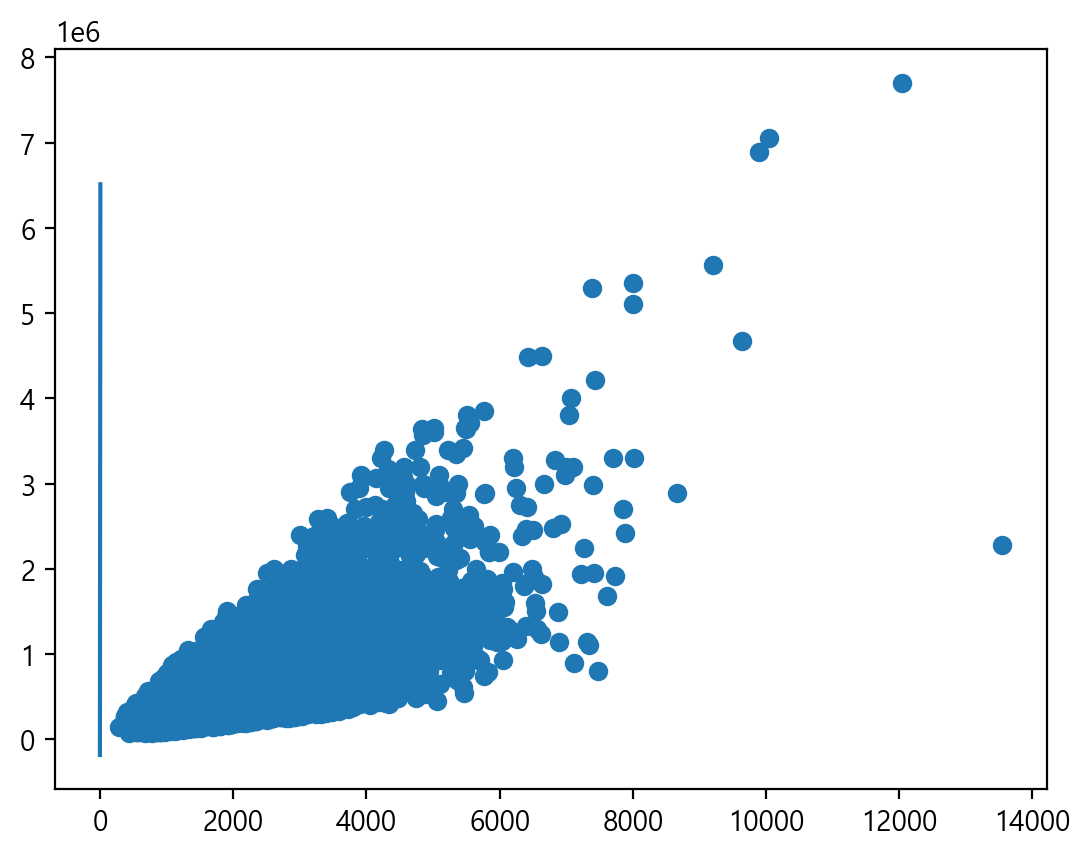

In [67]:
plt.scatter(df['sqft_living'], df['price']) # 실제값들 scatterplot

plt.plot(X, Y) # 회귀식 plot

In [61]:
X = [min(df['grade']), max(df['grade'])]

X

[0, 7]

In [62]:
Y1 = X[0] * a[-3] + b
Y2 = X[1] * a[-3] + b

Y = [Y1, Y2]

Y

[-183284.78791484993, 4526190.217996468]

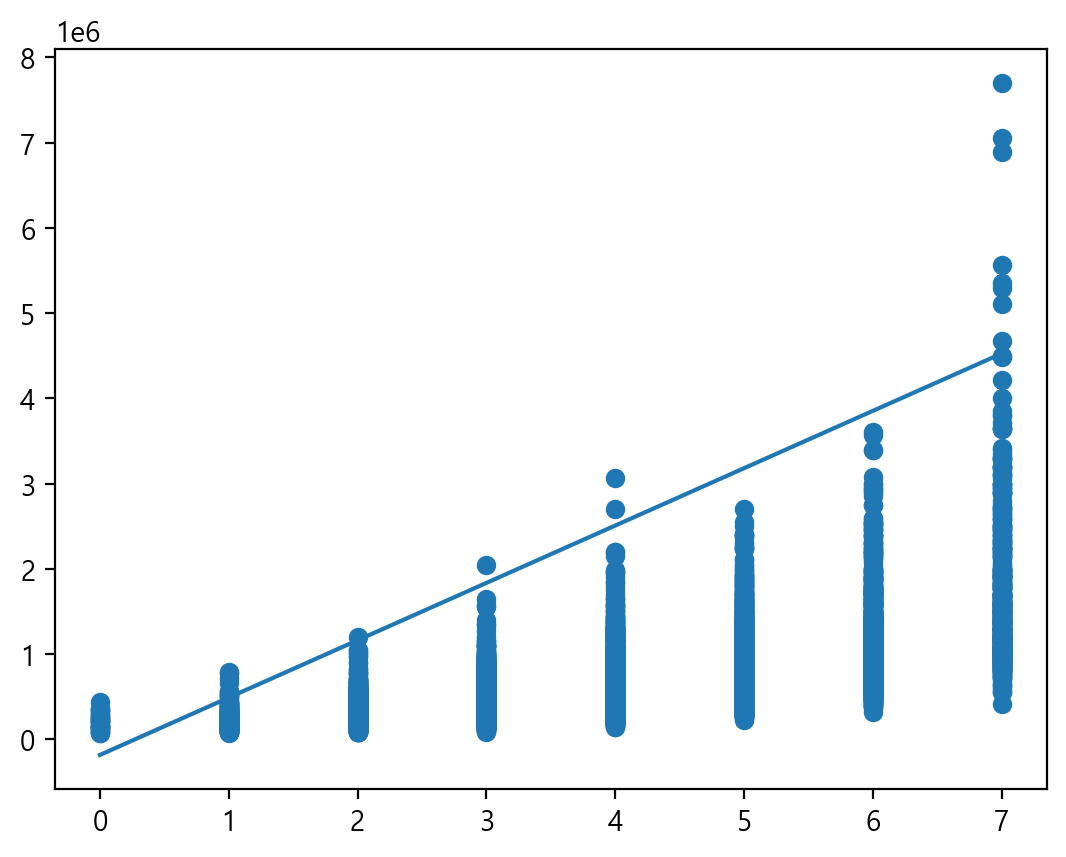

In [63]:
plt.scatter(df['grade'], df['price']) # 실제값들 scatterplot

plt.plot(X, Y) # 회귀식 plot

- sqft_living은 1m**2 증가 떄 마다 **평균집값 140(usd) 상승**
- grade는 1등급 올라갈 때 마다 **평균집값 92985(usd) 상승**

# ML2 : ENSENBLE
1. Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth = 5, n_estimators = 100)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [78]:
result['RF'] = r2_score(y_test, y_pred)

result

{'LR': 0.6015207442099336, 'RF': 0.6426405285476997}

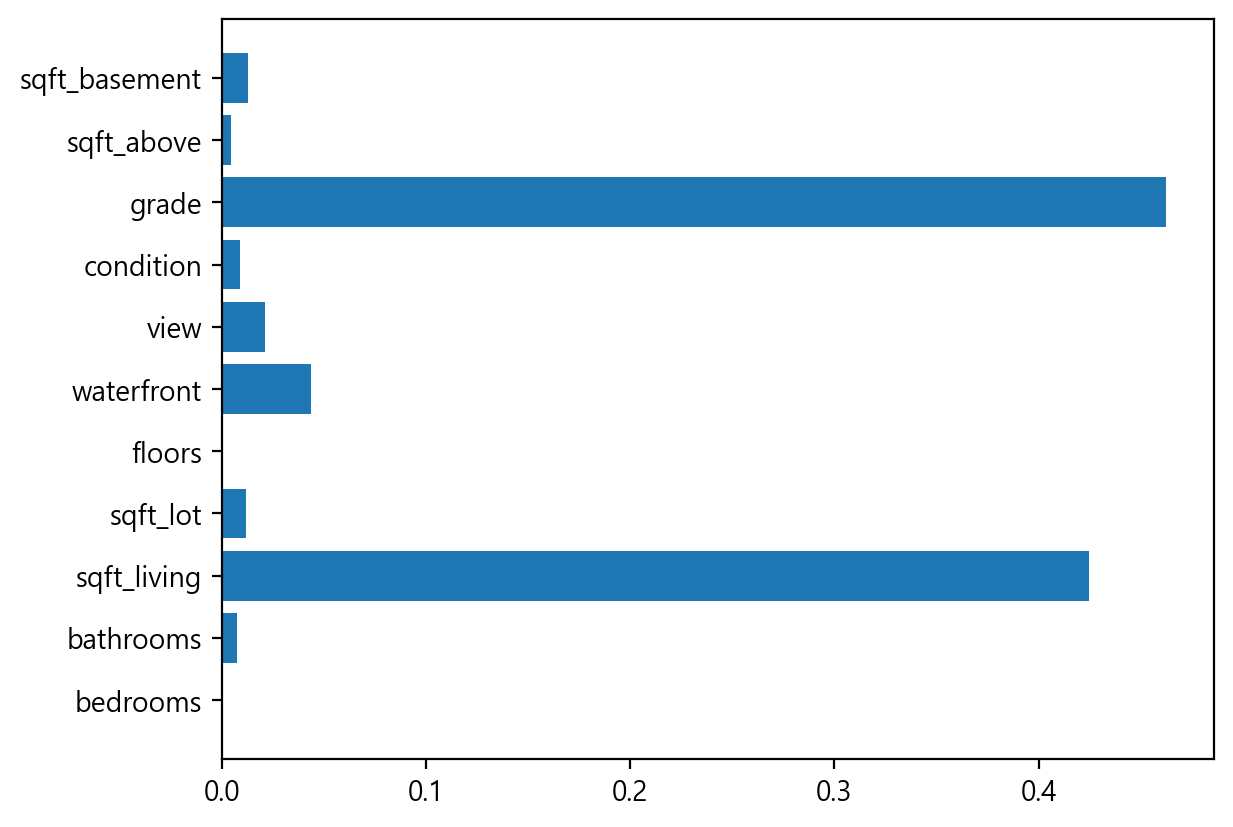

In [79]:
plt.barh(x.columns, model.feature_importances_)
plt.show()

2. Gradient Boosting Regressor

In [123]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

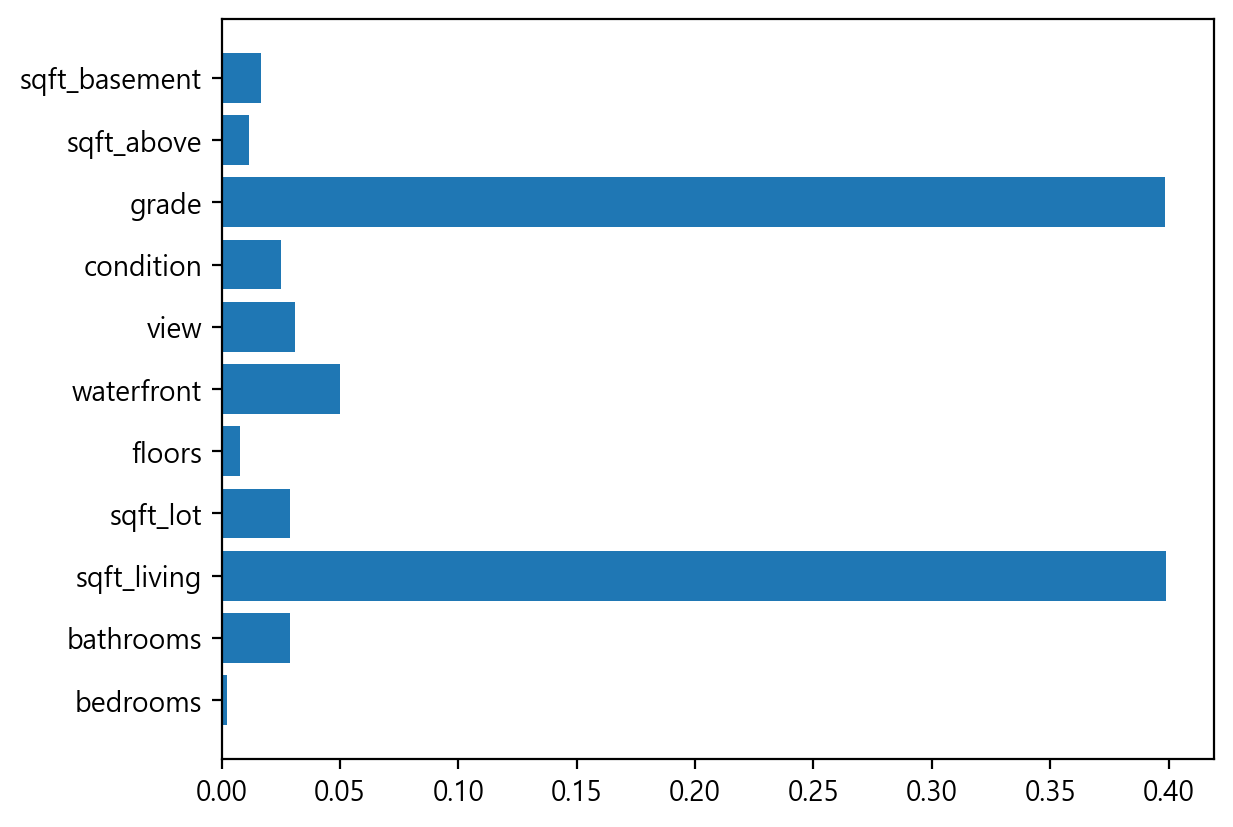

In [87]:
plt.barh(x.columns, model.feature_importances_)
plt.show()

In [124]:
result['GB'] = r2_score(y_test, y_pred)

result

{'LR': 0.6015207442099336, 'RF': 0.6426405285476997, 'GB': 0.6929942758805758}

- r2_score : GB > RF > LR

### GradientBoostingRegressor 튜닝

In [100]:
from sklearn.model_selection import GridSearchCV

# 'max_depth' 파라미터 지정
param = {'max_depth' : range(1, 11)}

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

model = GridSearchCV(model, param, cv = 5)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [101]:
# 최적 파라미터
model.best_params_

{'max_depth': 3}

In [127]:
model = GradientBoostingRegressor(max_depth=3, n_estimators=100, learning_rate=0.1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [128]:
r2_score(y_test, y_pred)

0.6917650257358811

### 집값 예측 Test

In [154]:
# bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement
my_test = [[2, 3, 1180, 5650, 1, 0, 1, 3, 6, 1180, 11000]]

my_test = scaler.transform(my_test)

print(f'해당 집의 예상가격은 {int(model.predict(my_test)[0])} 달러 입니다.')

해당 집의 예상가격은 920722 달러 입니다.


- 출처  
https://maps.google.com  
https://sites.google.com/view/vinegarhill-datalabs/introduction-to-machine-learning/kings-county-house-prices